A trucking company wants to predict its yearly maintenance expense for its yearly trucks using miles driven, and the age of truck at beginning of year

a) Estimate the MLR equation using given data<br>
b) Why is magnitude of miles coefficient so much lower than magnitude of age of truck coefficient<br>
c) Interpret R-Squared for this dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import statsmodels.api as sm

In [2]:
# Load the dataset
df = pd.read_excel("C:/Users/Karthik.Iyer/Downloads/AccelerateAI/Regression-Models-main/MLR_Q08_TruckMaintenance.xlsx")
df.head()

,Truck,Maintenance Expense,Miles Driven,Age of Truck
0,1,908.56,10500,10
1,2,751.12,9700,7
2,3,793.55,9200,8
3,4,619.61,8300,9
4,5,380.11,6500,5


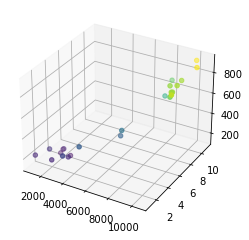

In [3]:
# Let's visualize the data in 3D
fig = plt.figure()
ax = plt.axes(projection='3d')

x1 = df['Miles Driven']
x2 = df['Age of Truck']
y = df['Maintenance Expense']

ax.scatter3D(x1, x2, y, c=y)

As we can see, the absolute values on x1 dimension is much larger than x2

### a) Estimate the MLR equation using given data

In [4]:
# Let's train the linear regression model

Y = df['Maintenance Expense']
X = df[['Miles Driven', 'Age of Truck']]

X = sm.add_constant(X)

reg_model = sm.OLS(Y,X).fit()

In [5]:
# View the model parameters

reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Maintenance Expense   R-squared:                       0.951
Model:                             OLS   Adj. R-squared:                  0.946
Method:                  Least Squares   F-statistic:                     195.0
Date:                 Thu, 12 May 2022   Prob (F-statistic):           7.62e-14
Time:                         19:48:18   Log-Likelihood:                -127.47
No. Observations:                   23   AIC:                             260.9
Df Residuals:                       20   BIC:                             264.3
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.4184     29.191      0.391      0.700     -49.473      72.310
Miles Driven     0.0712      0.009      8.274      0.000       0.053       0.089
Age of Truck    10.7086      9.186      1.166      0.257      -8.453      29.871
==============================================================================
Omnibus:                        1.263   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.532   Jarque-Bera (JB):                0.521
Skew:                          -0.362   Prob(JB):                        0.771
Kurtosis:                       3.142   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

F-test:p-value = Prob (F-statistic): 7.62e-14 => The model is significant overall

Coefficients:<br>
Miles Driven:beta = 0.0712, p-value of t-test:0.000 **=> Significant at 95% CI**<br>
Age of Truck:beta = 10.7086, p-value of t-test:0.257 **=> Not Significant at 95% CI**

**Regression Equation:**<br>
Maintenance Expense = 11.4184+0.0712*Miles Driven

### b) Why is magnitude of miles driven coefficient so much lower than magnitude of age of truck coefficient

This is due to diference in the absolute values for each of these variables. One in thousands, and another in tens

### c) Interpret R-squared for this dataset

In [6]:
# We need to re-train the model with only significant variables

Y = df['Maintenance Expense']
X = df['Miles Driven']

X = sm.add_constant(X)
reg_model = sm.OLS(Y,X).fit()
print(reg_model.summary())

                             OLS Regression Results                            
Dep. Variable:     Maintenance Expense   R-squared:                       0.948
Model:                             OLS   Adj. R-squared:                  0.945
Method:                  Least Squares   F-statistic:                     382.2
Date:                 Thu, 12 May 2022   Prob (F-statistic):           5.92e-15
Time:                         19:48:18   Log-Likelihood:                -128.22
No. Observations:                   23   AIC:                             260.4
Df Residuals:                       21   BIC:                             262.7
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.2242     29.398    

**The R-Squared value is 0.948. This means 94.8% variation in the expense is explained by variation in the miles driven**